In [1]:
import pandas as pd

In [2]:
import math

In [4]:
import numpy as np

In [13]:
from scipy import integrate

In [19]:
from matplotlib import pyplot as plt

In [20]:
matplotlib inline

In [21]:
%config InlineBackend.figure_format ='retina'

In [60]:
cf = -105/np.sqrt(4 * np.pi * math.factorial(6))

def Y43(theta, phi, k, N):
    dist = np.exp(- k * cf * np.cos(theta) * (np.sin(theta)**3) * np.cos(3*phi)) * np.sin(theta)
    return dist/N

In [61]:
cf

-1.10387047838382

In [62]:
N = 18.2153
N2 = 12.6151

In [63]:
import scipy

## Marginal Stationary Distributions

In [139]:
thetas = np.linspace(0,np.pi,1000000)
phis = np.linspace(0,2*np.pi,2000000)

### Theta coordinate $\theta$

In [79]:
marginal_theta = []
for theta in thetas:
    f_theta = integrate.simps(Y43(theta, phis,.5,N), phis)
    marginal_theta.append(f_theta)

In [80]:
mar_theta_arr = np.array(marginal_theta)

### Phi coordinate $\phi$

In [81]:
marginal_phi = []
for phi in phis:
    f_phi = integrate.simps(Y43(thetas, phi,.5,N), thetas)
    marginal_phi.append(f_phi)

In [82]:
mar_phi_arr = np.array(marginal_phi)

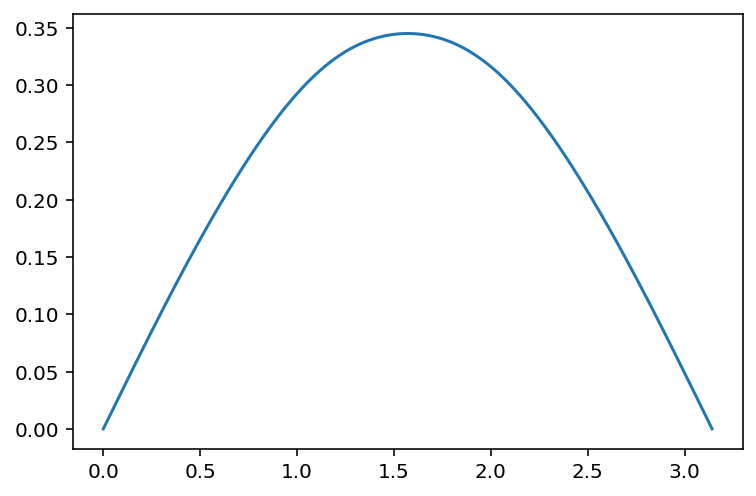

In [83]:
plt.plot(thetas, mar_theta_arr)
#plt.ylim(0,4.5)

In [84]:
integrate.simps(mar_theta_arr, thetas)

0.692552682540659

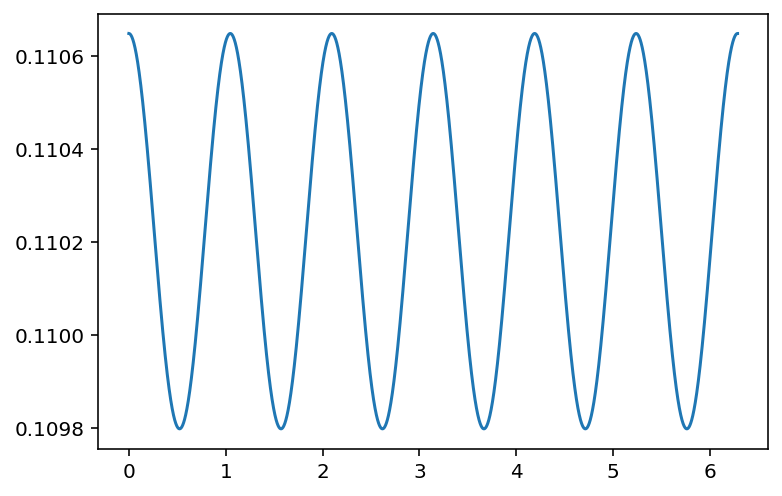

In [85]:
plt.plot(phis, mar_phi_arr)
#plt.ylim(0,.17)

In [86]:
integrate.simps(mar_phi_arr, phis)

0.692552682540659

## 3D Plot

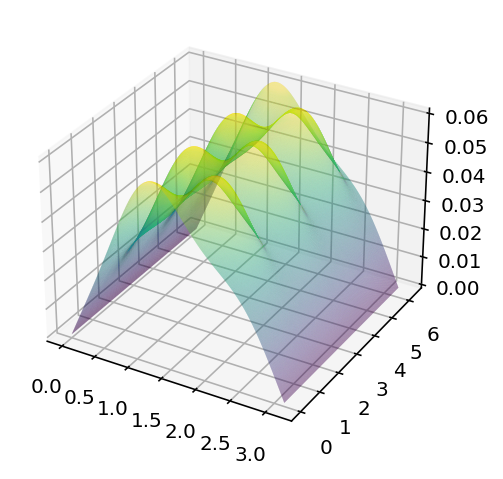

In [91]:
theta_p, phi_p = np.linspace(0, np.pi, 1000), np.linspace(0, 2*np.pi, 1000)
THETA, PHI = np.meshgrid(theta_p, phi_p)


#X, y = np.meshgrid(theta_p, phi_p)

Z = Y43(THETA, PHI, .5, N)
ax = plt.axes(projection='3d')
ax.plot_surface(THETA,PHI,Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha = .5)
#ax.axis('off')
plt.show()

In [95]:
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

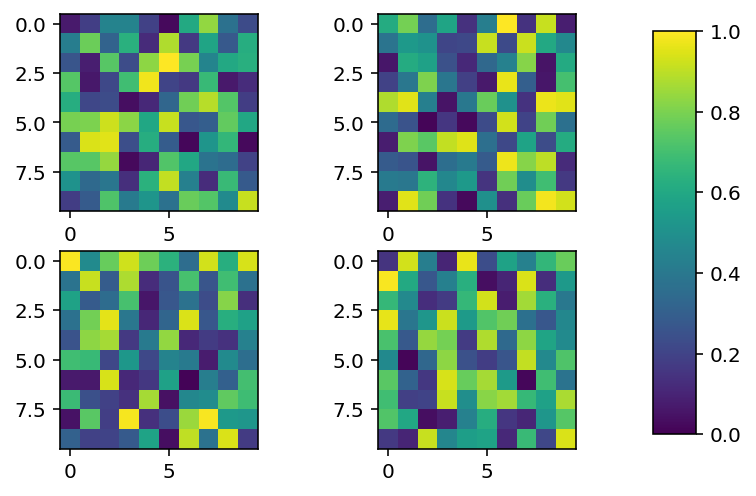

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

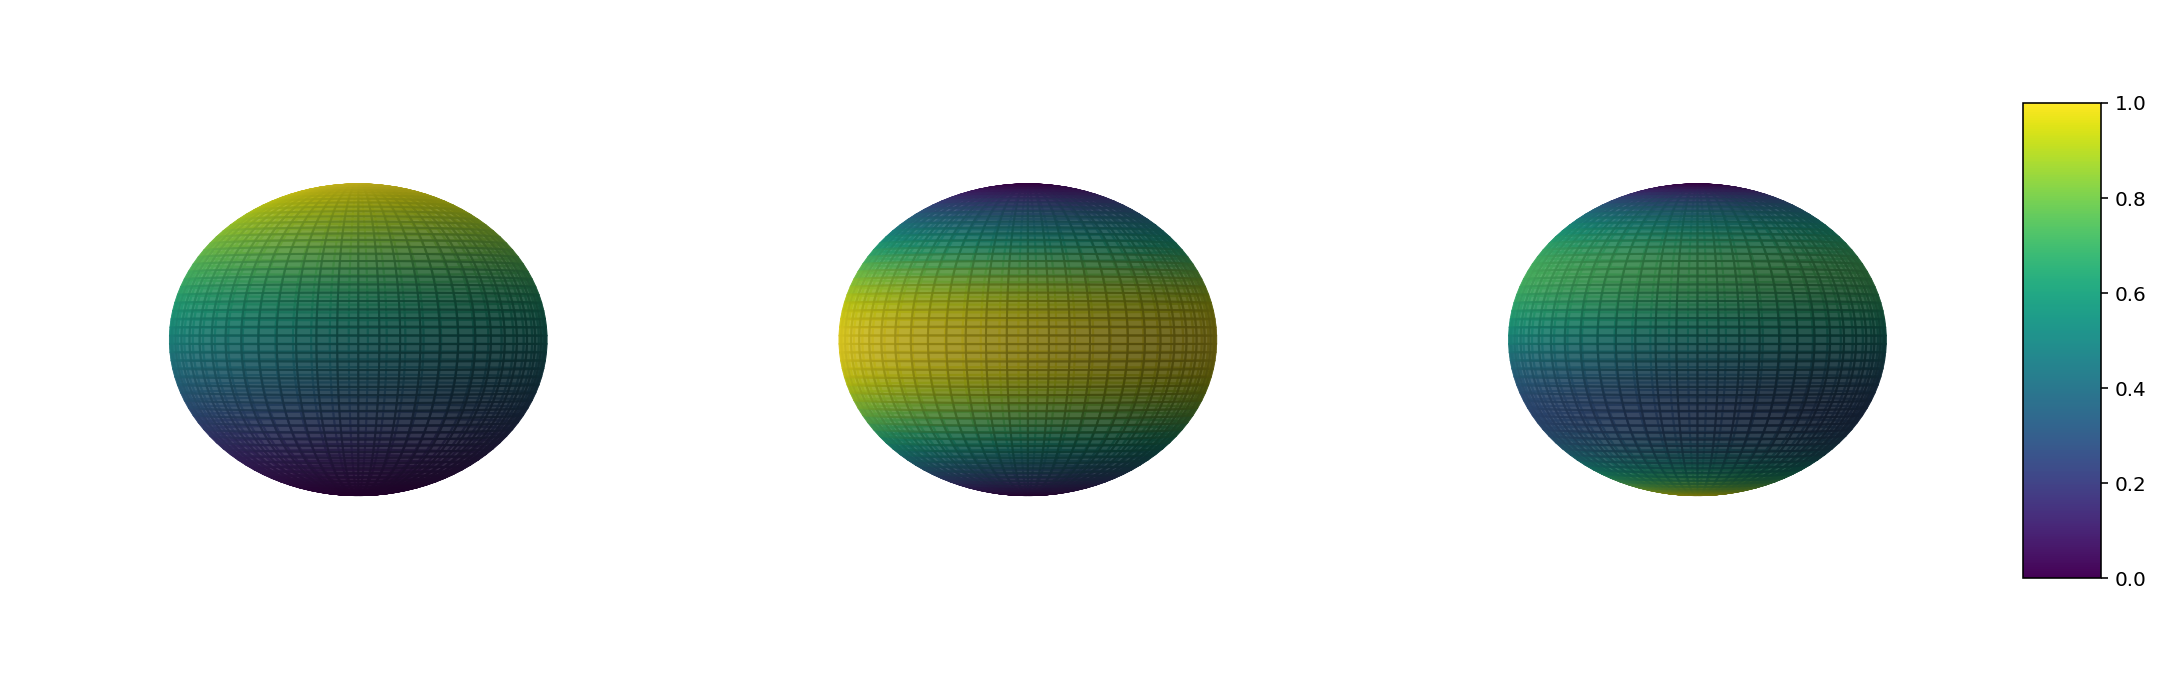

In [101]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


vpolar, vazim = 0,0

#fig, ax = plt.subplots(nrows=1, ncols=3, projection='3d')

u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:60j]
radio1 = np.sqrt(3./(4*np.pi))*np.cos(v)
x1=np.cos(u)*np.sin(v)
y1=np.sin(u)*np.sin(v)
z1=np.cos(v)
#ax.plot_surface(x, y, z, color="r", alpha = 0.15)
fcolors1 = radio1
fmax1, fmin1 = fcolors1.max(), fcolors1.min()
fcolors1 = (fcolors1 - fmin1)/(fmax1 - fmin1)
ax1.plot_surface(x1, y1, z1,  rstride=1, cstride=1, facecolors=cm.viridis(fcolors1), alpha = 0.68)
ax1._axis3don = False
ax1.view_init(vpolar, vazim)

radio2 = -np.sqrt((5./(16*np.pi))) * (3 * np.cos(v)**2 - 1)
x2=np.cos(u)*np.sin(v)
y2=np.sin(u)*np.sin(v)
z2=np.cos(v)
#ax.plot_surface(x, y, z, color="r", alpha = 0.15)
fcolors2 = radio2
fmax2, fmin2 = fcolors2.max(), fcolors2.min()
fcolors2 = (fcolors2 - fmin2)/(fmax2 - fmin2)
ax2.plot_surface(x2, y2, z2,  rstride=1, cstride=1, facecolors=cm.viridis(fcolors2), alpha = 0.68)
ax2._axis3don = False
ax2.view_init(vpolar, vazim)

radio3 = -np.sqrt((7./(16*np.pi))) * (5 * np.cos(v)**3 - 3 * np.cos(v))
x3=np.cos(u)*np.sin(v)
y3=np.sin(u)*np.sin(v)
z3=np.cos(v)
#ax.plot_surface(x, y, z, color="r", alpha = 0.15)
fcolors3 = radio3
fmax3, fmin3 = fcolors3.max(), fcolors3.min()
fcolors3 = (fcolors3 - fmin3)/(fmax3 - fmin3)
ax3.plot_surface(x3, y3, z3,  rstride=1, cstride=1, facecolors=cm.viridis(fcolors3), alpha = 0.68)
ax3._axis3don = False
ax3.view_init(vpolar, vazim)

#im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)


plt.subplots_adjust(wspace=0, hspace=0)

cbar_ax = fig.add_axes([0.9, 0.37, 0.03, 0.275])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(ax3, cax=cbar_ax)

#fig.savefig('Potential_Heatmaps3.png', dpi=300)


plt.show()

In [122]:
cy10 = np.sqrt(3./(4*np.pi))
def Y10(theta,N,u0_gamma):
    return np.exp(- u0_gamma * cy10 * np.cos(theta)) * np.sin(theta) / N

In [116]:
cy20 = -np.sqrt((5./(16*np.pi)))
def Y20(theta,N,u0_gamma):
    return np.exp(- u0_gamma * cy20 * (3 * np.cos(theta)**2 - 1)) * np.sin(theta) / N

In [148]:
cy30 = -np.sqrt((7./(16*np.pi)))
def Y30(theta,N,u0_gamma):
    return np.exp( - u0_gamma * cy30 * (5 * np.cos(theta)**3 - 3 * np.cos(theta))) * np.sin(thetas) / N

In [124]:
D = .1

In [125]:
5.0*np.sqrt(2*D)/D

22.360679774997898

In [126]:
integrate.simps(Y10(thetas,1,5.0*np.sqrt(2*D)/D), thetas)

5086.708476014138

In [140]:
NY10 = integrate.simps(Y10(thetas,1,5.0*np.sqrt(2*D)/D), thetas)

In [141]:
integrate.simps(Y20(thetas,1,5.0*np.sqrt(2*D)/D), thetas)

64730.73128110564

In [142]:
NY20 = integrate.simps(Y20(thetas,1,5.0*np.sqrt(2*D)/D), thetas)

In [143]:
integrate.simps(Y30(thetas,1, 5.0*np.sqrt(2*D)/D), thetas)

16430.13145970532

In [149]:
NY30 = integrate.simps(Y30(thetas,1, 5.0*np.sqrt(2*D)/D), thetas)

In [150]:
NY30

181894.068042125

In [133]:
NY30Mathematica = 181894

In [134]:
NY30Mathematica

181894

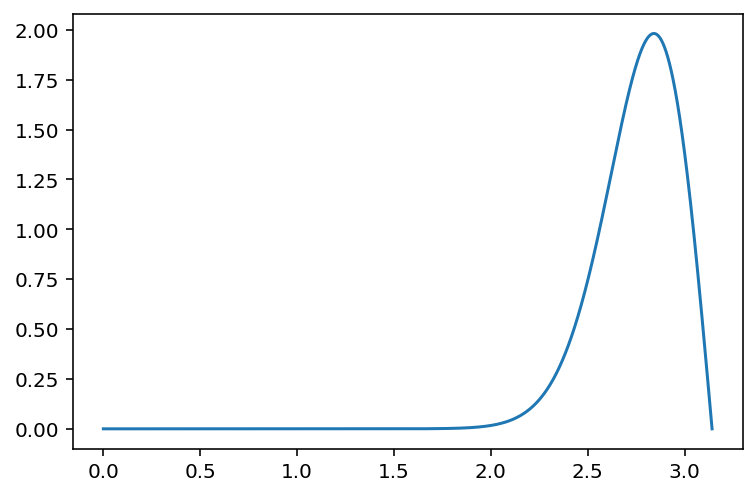

In [151]:
plt.plot(thetas, Y10(thetas, NY10, 5.0*np.sqrt(2*D)/D))

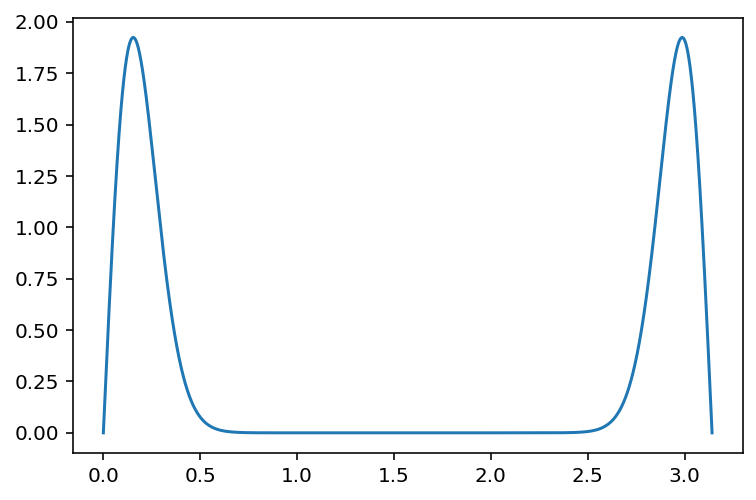

In [152]:
plt.plot(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D))

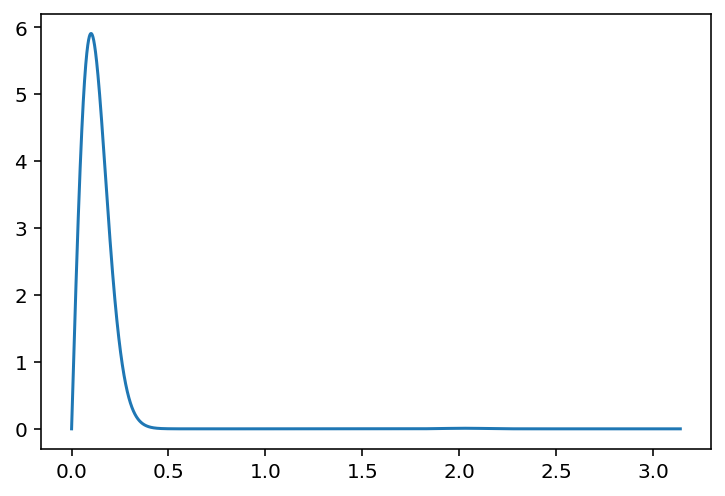

In [153]:
plt.plot(thetas, Y30(thetas, NY30, 5.0*np.sqrt(2*D)/D))

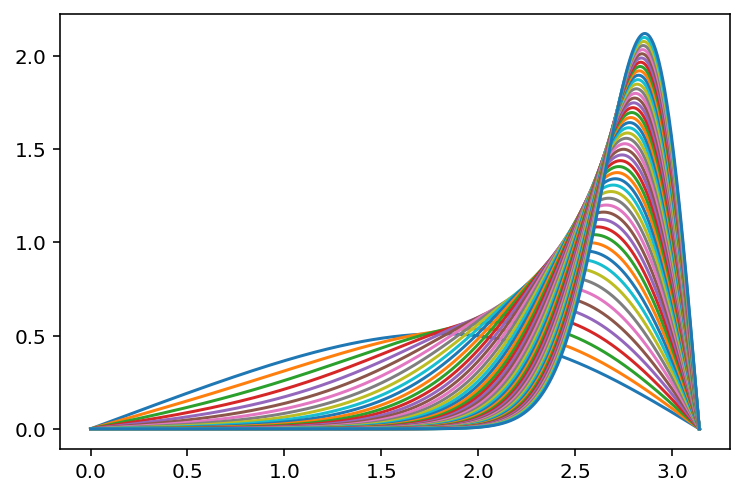

In [160]:
for amp in [.5*(i+1) for i in range(51)]:
    NY10 = integrate.simps(Y10(thetas,1,amp), thetas)
    plt.plot(thetas, Y10(thetas, NY10, amp))

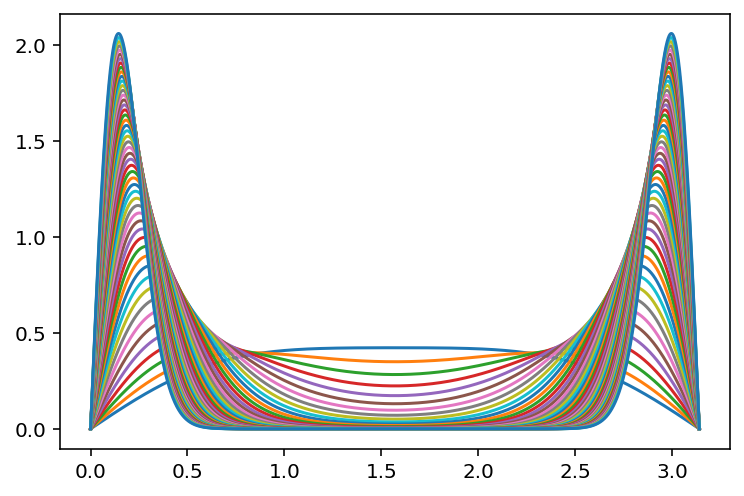

In [161]:
for amp in [.5*(i+1) for i in range(51)]:
    NY20 = integrate.simps(Y20(thetas,1,amp), thetas)
    plt.plot(thetas, Y20(thetas, NY20, amp))

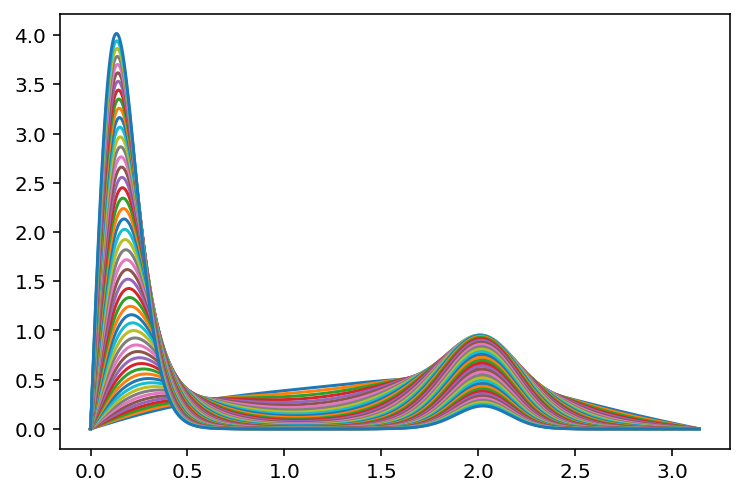

In [163]:
for amp in [.25*(i+1) for i in range(51)]:
    NY30 = integrate.simps(Y30(thetas,1,amp), thetas)
    plt.plot(thetas, Y30(thetas, NY30, amp), )

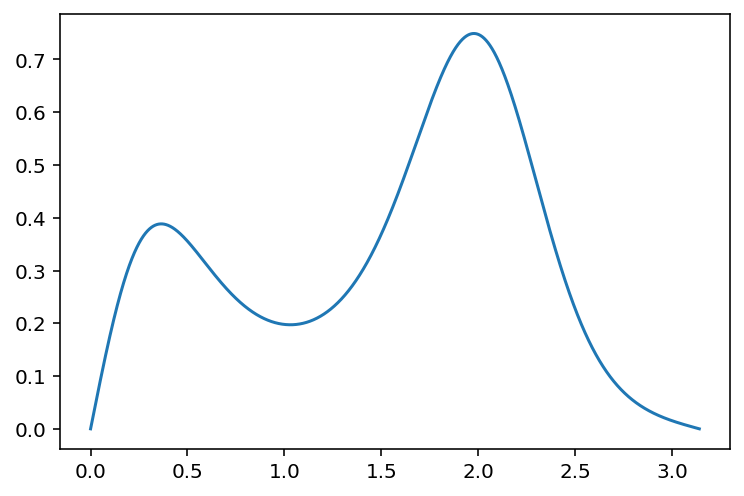

In [170]:
NY30 = integrate.simps(Y30(thetas,1,1.95), thetas)
plt.plot(thetas, Y30(thetas, NY30, 1.95))

In [169]:
integrate.simps(Y30(thetas,NY30,0.95), thetas)

0.9999999999999999